In [1]:
import pandas as pd

In [2]:
#loading data
crop = pd.read_csv(r'C:\Users\91984\Downloads\Crop_recommendation.csv')
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
target = crop['label']

In [4]:
#max_min normalization
from sklearn.preprocessing import MinMaxScaler
# define data
data1 = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled1 = scaler.fit_transform(data1)
print(scaled1)

[[0.64285714 0.26428571 0.19       ... 0.79026683 0.46626364 0.65645778]
 [0.60714286 0.37857143 0.18       ... 0.77063285 0.54948026 0.74167459]
 [0.42857143 0.35714286 0.195      ... 0.79397664 0.67421877 0.87571039]
 ...
 [0.84285714 0.2        0.125      ... 0.61788046 0.44443315 0.55007079]
 [0.83571429 0.19285714 0.145      ... 0.44175991 0.50604494 0.38428046]
 [0.74285714 0.09285714 0.125      ... 0.53822177 0.50931694 0.43372112]]


In [5]:
#with minmax normalization
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(scaled1,target,test_size = 0.2,random_state =2)

In [6]:
#hyperparamter tuning with minmax normalization
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'criterion' : ['gini', 'entropy'],
          'splitter':['best', 'random']}
gs2 = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
g_res2= gs2.fit(x_train2, y_train2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


In [7]:
g_res2.best_score_

0.9835214245706655

In [8]:
g_res2.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [9]:
dt2 = DecisionTreeClassifier(criterion= 'gini' ,splitter='best')
dt2.fit(x_train2,y_train2)

DecisionTreeClassifier()

In [10]:
# Training & Testing accuracy after applying hyper parameter
dt_train_accuracy = dt2.score(x_train2,y_train2)
print("dt_train_accuracy = ",dt2.score(x_train2,y_train2))
#Print Test Accuracy
dt_test_accuracy = dt2.score(x_test2,y_test2)
print("dt_test_accuracy = ",dt2.score(x_test2,y_test2))

dt_train_accuracy =  1.0
dt_test_accuracy =  0.9818181818181818


In [11]:
#plotting decision tree
from sklearn import tree

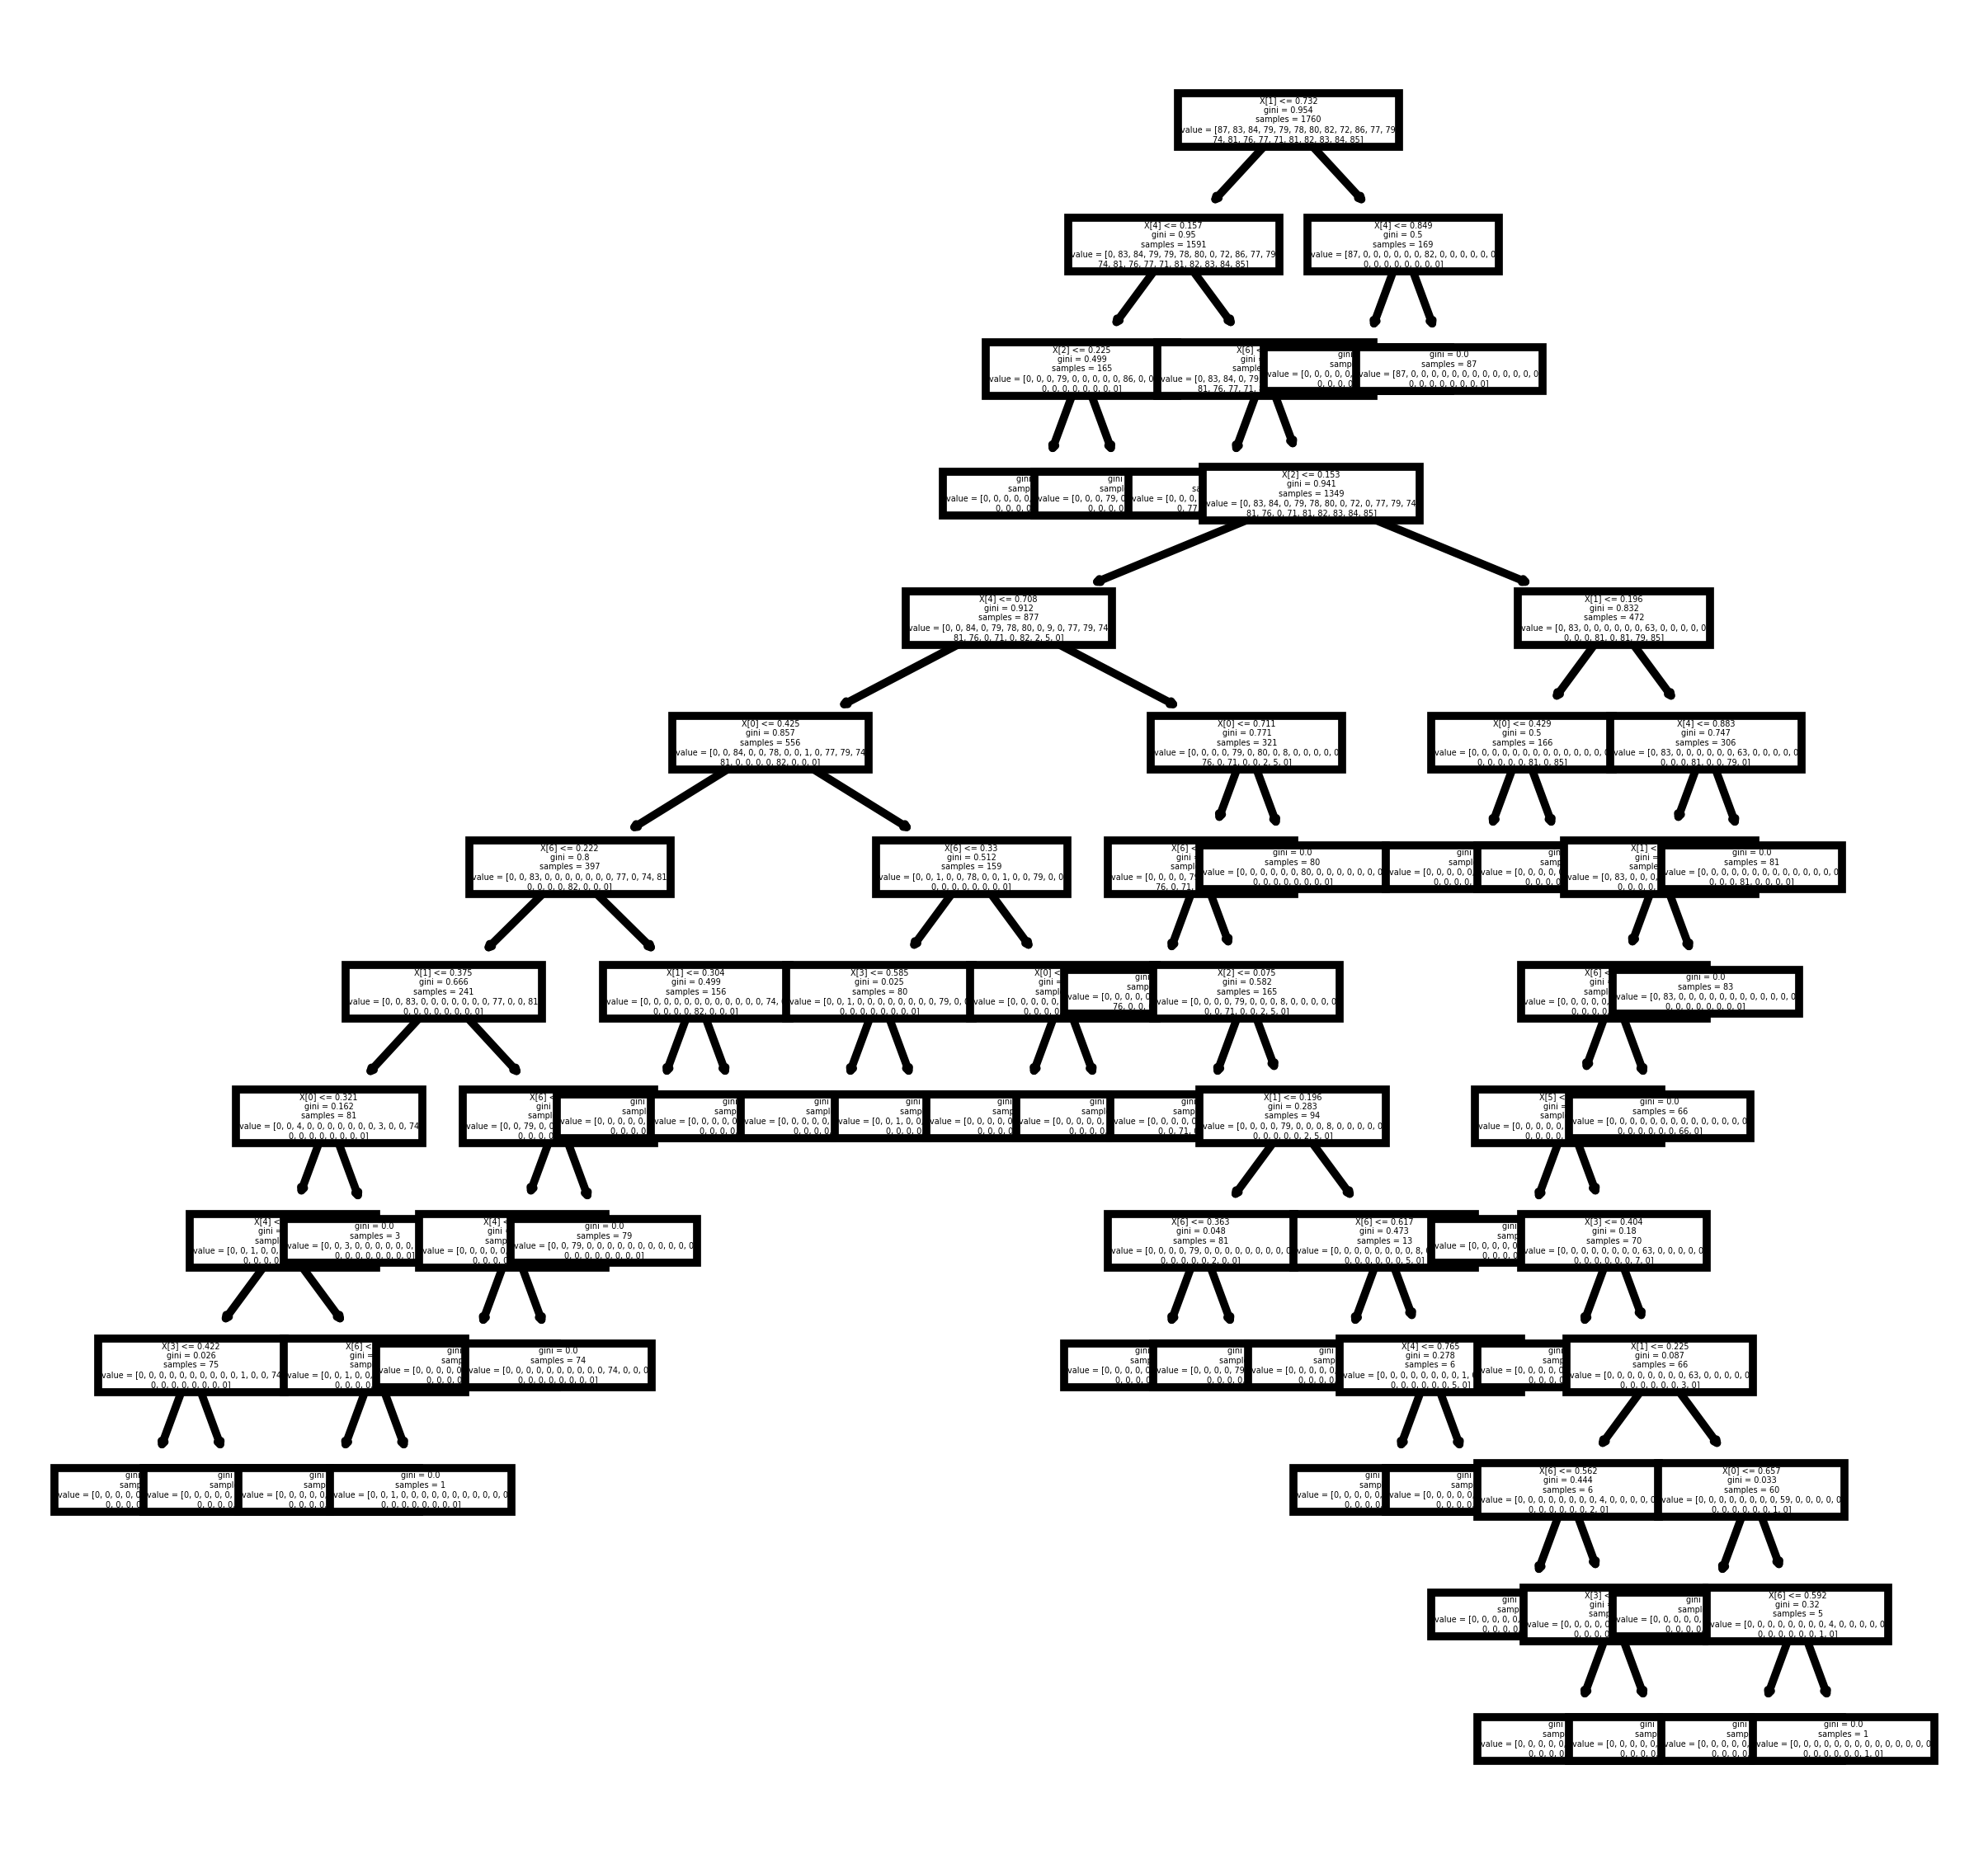

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700)
tree.plot_tree(dt2);
fig.savefig('DECISION TREE.png')

In [13]:
acc = []
model = []

In [14]:
from sklearn.metrics import classification_report
from sklearn import metrics

predicted_values = dt2.predict(x_test2)
x = metrics.accuracy_score(y_test2, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test2,predicted_values))

Decision Tree's Accuracy is:  98.18181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.93      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.91      0.95        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

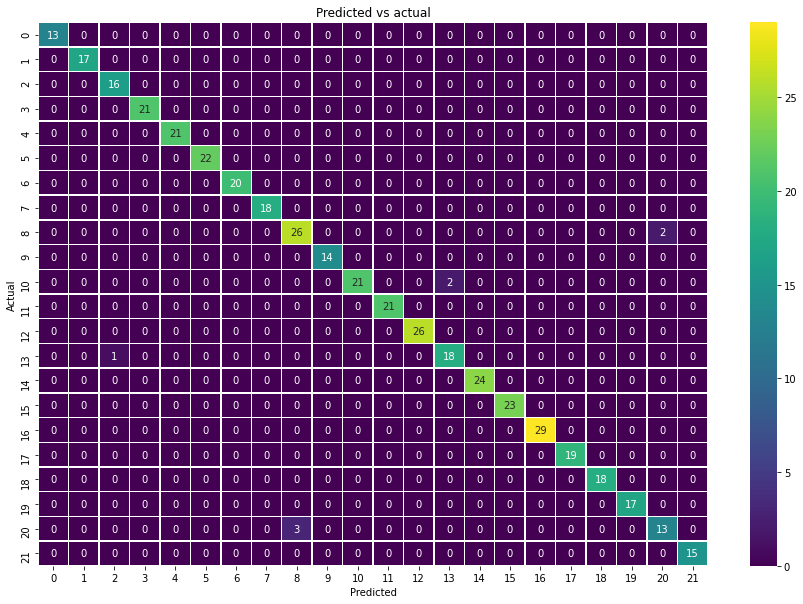

In [15]:
y_pred = dt2.predict(x_test2)
y_true = y_test2

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()